In [1]:
pip install requests tensorflow matplotlib numpy Pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ASUS\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display

from tensorflow.keras.applications import VGG16

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

%matplotlib inline

In [7]:
train_dir = r"D:\BANGKIT\CAPSTONE\CODING FITUR 1\Dataset\training"
val_dir = r"D:\BANGKIT\CAPSTONE\CODING FITUR 1\Dataset\validation"

In [8]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in vgg_model.layers:
    layer.trainable = False

In [9]:
model = Sequential()
model.add(vgg_model)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.9:
            print("\nReached desired accuracy! Training stopped.")
            self.model.stop_training = True
            
callbacks = myCallback()

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=6,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=6,
    class_mode='categorical')


Found 2400 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7)

hist = model.fit(
    train_generator,
    steps_per_epoch=60,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=38,
    batch_size=50,
    callbacks=[callbacks]
)

Epoch 1/25
60/60 [==============================] - 91s 1s/step - loss: 2.2151 - accuracy: 0.3250 - val_loss: 1.4503 - val_accuracy: 0.5746
Epoch 2/25
60/60 [==============================] - 83s 1s/step - loss: 1.0641 - accuracy: 0.6333 - val_loss: 0.8604 - val_accuracy: 0.6886
Epoch 3/25
60/60 [==============================] - 85s 1s/step - loss: 0.8447 - accuracy: 0.7167 - val_loss: 0.8082 - val_accuracy: 0.7149
Epoch 4/25
60/60 [==============================] - 81s 1s/step - loss: 1.1005 - accuracy: 0.6194 - val_loss: 1.0352 - val_accuracy: 0.6579
Epoch 5/25
60/60 [==============================] - 82s 1s/step - loss: 0.6957 - accuracy: 0.7694 - val_loss: 0.9149 - val_accuracy: 0.7018
Epoch 6/25
60/60 [==============================] - 80s 1s/step - loss: 0.8213 - accuracy: 0.7306 - val_loss: 0.5619 - val_accuracy: 0.7807
Epoch 7/25
60/60 [==============================] - 80s 1s/step - loss: 0.6499 - accuracy: 0.7889 - val_loss: 0.7092 - val_accuracy: 0.7500
Epoch 8/25
60/60 [==

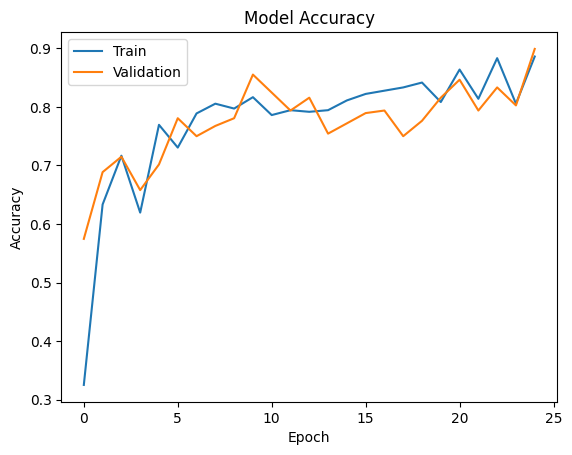

In [13]:
# Menampilkan plot akurasi pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

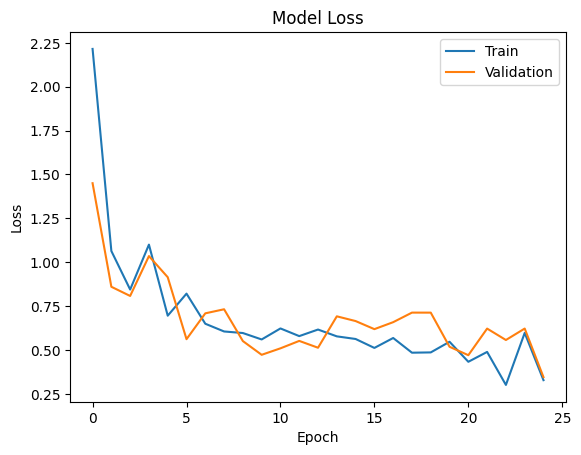

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

KLASIFIKASI KATEGORI 8 jenis barang
silahkan upload gambar MATRAS



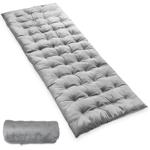

1/1 [==============================] - 0s 364ms/step
HASIL DETEKSINYA: 

Berhasil mengupload MATRAS


In [17]:
print("KLASIFIKASI KATEGORI 8 jenis barang")
inputan = input("Masukkan jenis kategori =  ").upper()
if inputan in ['LCD', 'MATRAS', 'TENDA', 'CAMERA', 'SEPATU', 'SPEAKER','PS','TAS']:
    print("silahkan upload gambar", inputan)
    print()

    # Terima input gambar dari user
    path = input("Masukkan path gambar: ")

    # Mengubah ukuran gambar sesuai dengan kebutuhan model
    img = Image.open(path).resize((150,150))

    # Menampilkan gambar yang di-upload
    display(img)

    # Mengubah gambar menjadi array
    x = np.array(img)
    # Menambahkan dimensi baru ke array
    x = np.expand_dims(x, axis=0)
    # Menggabungkan array menjadi stack
    images = np.vstack([x])

    # Melakukan prediksi dengan model
    classes = model.predict(images, batch_size=10)

    # Cek hasil prediksi
    print("HASIL DETEKSINYA: ")
    print()

    if classes[0][0] == 1:
        hasil = 'CAMERA'
    elif classes[0][1] == 1:
        hasil = 'LCD'
    elif classes[0][2] == 1:
        hasil = 'MATRAS'
    elif classes[0][3] == 1:
        hasil = 'PS'
    elif classes[0][4] == 1:
        hasil = 'SEPATU' 
    elif classes[0][5] == 1:
        hasil = 'SPEAKER' 
    elif classes[0][6] == 1:
        hasil = 'TAS'
    elif classes[0][7] == 1:
        hasil = 'TENDA'        
    else:
        print('Gambar SALAH')
        hasil = None

    if hasil is not None:
        if inputan == hasil:
            print("Berhasil mengupload", hasil)
        else:
            print("Gagal, gambar tersebut adalah", hasil, "bukan ", inputan)
else:
    print("kategori", inputan, "tidak tersedia")